# **1. Perkenalan Dataset**


Dataset yang digunakan pada proyek submisi akhir ini adalah Bank Transaction Dataset for Fraud Detection.

1. **Sumber Dataset**:  
   Dataset diperoleh dari Kaggle yang dapat diakses melalui link: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection?resource=download
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

4. **Informasi Tentang Dataset**:
    - Deskripsi Dataset:
    
    Dataset ini menyajikan informasi  mengenai perilaku transaksi dan pola aktivitas finansial, cocok untuk eksplorasi dalam mendeteksi penipuan (fraud detection) serta identifikasi anomali. Dataset ini berisi 2.512 entri data transaksi yang mencakup berbagai atribut transaksi, data demografis pelanggan, dan pola penggunaan.

    - Fitur Dataset:
      - TransactionID: ID unik (alphanumeric) untuk setiap transaksi.
      - AccountID: ID unik untuk setiap akun; satu akun dapat memiliki banyak transaksi.
      - TransactionAmount: Nilai uang dalam setiap transaksi, mulai dari pengeluaran kecil hingga pembelian dalam jumlah besar.
      - TransactionDate: Tanggal dan waktu saat transaksi dilakukan.
      - TransactionType: Jenis transaksi, dikategorikan sebagai Credit (kredit) atau Debit (debit).
      - Location: Lokasi geografis transaksi, berupa nama-nama kota di Amerika Serikat.
      - DeviceID: ID unik perangkat yang digunakan untuk melakukan transaksi.
      - IP Address: Alamat IP (IPv4) yang digunakan dalam transaksi; beberapa akun memiliki perubahan IP secara berkala.
      - MerchantID: ID unik untuk setiap merchant (penjual), termasuk merchant yang sering digunakan maupun yang mencurigakan.
      - AccountBalance: Saldo akun setelah transaksi berlangsung, berkaitan secara logis dengan jenis dan jumlah transaksi.
      - PreviousTransactionDate: Tanggal dan waktu transaksi sebelumnya dari akun yang sama, berguna untuk menghitung frekuensi transaksi.
      - Channel: Saluran transaksi, seperti Online, ATM, atau Branch (kantor cabang).
      - CustomerAge: Usia pemilik akun, dikelompokkan berdasarkan profesi.
      - CustomerOccupation: Profesi pemilik akun, seperti Dokter, Insinyur, Mahasiswa, atau Pensiunan, yang mencerminkan pola pendapatan.
      - TransactionDuration: Lama waktu transaksi dalam detik, yang bervariasi tergantung jenis transaksi.
      - LoginAttempts: Jumlah percobaan login sebelum transaksi dilakukan. Nilai yang tinggi bisa mengindikasikan aktivitas mencurigakan.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [316]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [317]:
bank_transaction = pd.read_csv("https://raw.githubusercontent.com/qnyara5/MLBP-Submission/57d9d7249e5a605c50364a3b18b77044d51262f1/bank_transactions_data_2.csv")
bank_transaction

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data

In [318]:
bank_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

**Insight:**

Berdasarkan informasi dari dataset bank transaction, jumlah data non-null di setiap kolom adalah sama yaitu 2512 baris data. Tidak ada missing values di setiap kolom.

Namun tipe data kolom TransactionDate dan PreviousTransactionDate seharusnya bertipe data datetime karena merupakan atribut tanggal.

### 2. Menangani Data yang Hilang

In [319]:
bank_transaction.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


**Insight:**

Tidak terdapat nilai null dalam setiap kolom pada data bank_transaction

In [320]:
print("Jumlah duplikasi: ", bank_transaction.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

Tidak terdapat duplikasi pada data bank_transaction

### 3. Analisis Distribusi dan Korelasi

In [321]:
bank_transaction.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**Insight:**

- Sebagian besar transaksi bernilai kecil hingga menengah, namun ada beberapa transaksi besar yang kemungkinan bisa menjadi outlier.
- Usia nasabah bervariasi, tetapi usia rata rata adalah 44
- Durasi transaksi rata-rata sekitar 2 menit
- Mayoritas transaksi terjadi hanya dengan satu kali login, percobaan login lebih dari sekali bisa jadi merupakan potensi fraud.

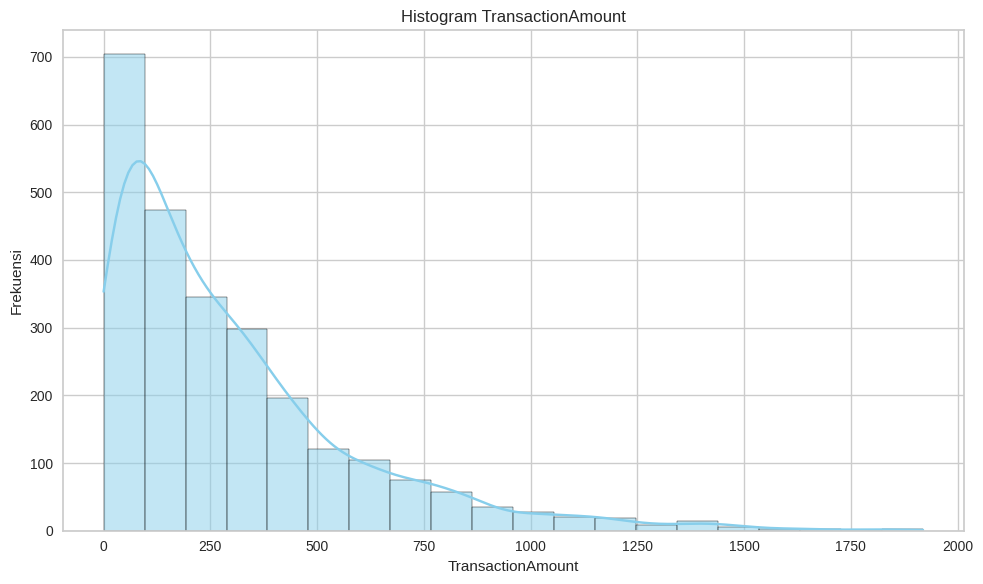

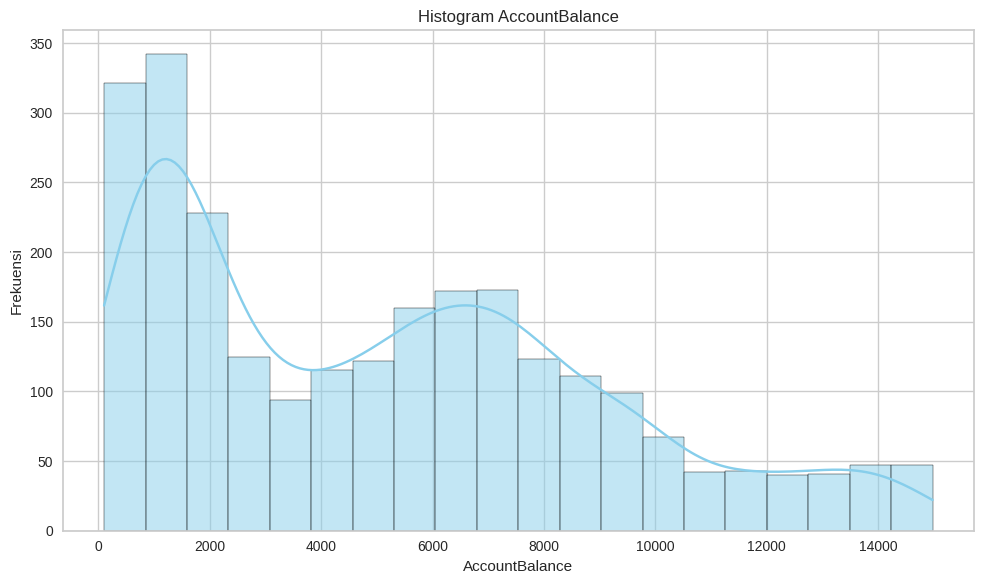

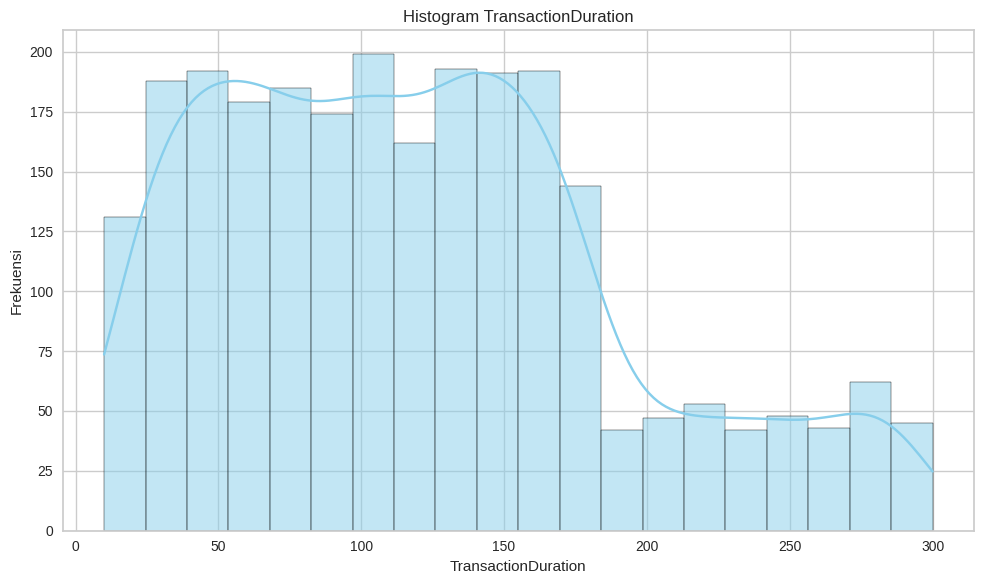

In [322]:
numerical = ["TransactionAmount", "AccountBalance", "TransactionDuration"]

for var in numerical:
    plt.figure(figsize=(10, 6))
    sns.histplot(bank_transaction[var], bins=20, kde=True, color="skyblue")
    plt.title(f'Histogram {var}')
    plt.xlabel(var)
    plt.ylabel("Frekuensi")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**Insight:**

- Insight histogram TransactionAmount:

  Distribusi bersifat condong ke kanan, sebagian besar transaksi berada di kisaran nilai rendah (0-250)

  Semakin tinggi jumlah transaksinya, frekuensinya semakin kecil. Artinya hanya sedikit transaksi bernilai besar. Pola ini mengindikasikan bahwa mayoritas nasabah lebih sering melakukan transaksi kecil, sementara transaksi besar jarang terjadi.

- Insight histogram AccountBalance:

  Distrbusi bersifat condong ke kanan, mayoritas nasabah memiliki saldo di kisaran 0 - 2000

- Insight histogram TransactionDuration:

  Distribusi bersifat condong ke kanan, yang menunjukkan bahwa mayoritas durasi transaksi sangat singkat.


In [323]:
numerical = bank_transaction.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical.corr()
corr_matrix


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


**Insight:**

Hubungan antar fitur memiliki nilai korelasi yang tergolong rendah, sehingga dapat diambil kesimpulan bahwa setiap fitur saling independen.

- Jumlah transaksi (TransactionAmount) dan durasi (TransactionDuration) tidak berkorelasi signifikan dengan variabel lain.
- Saldo akun (AccountBalance) berkorelasi positif dengan usia nasabah (0.32)


### 4. Visualisasi Data

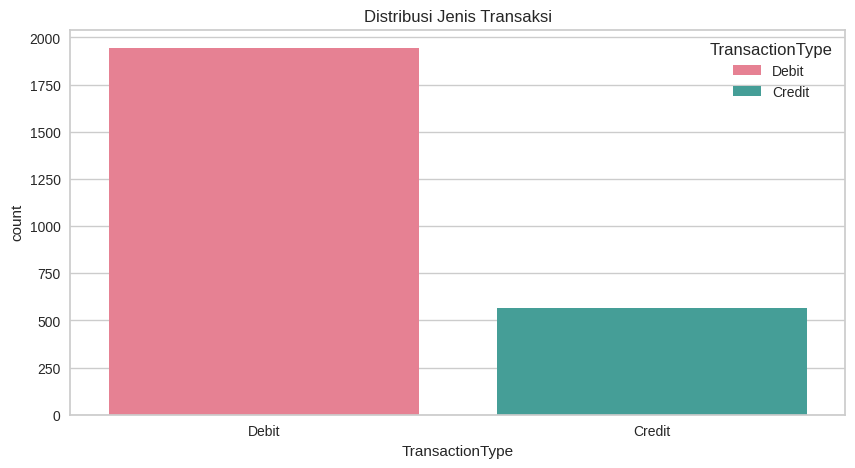

In [324]:
plt.figure(figsize=(10,5))
unique_types = bank_transaction['TransactionType'].nunique()
palette = sns.color_palette("husl", unique_types)

sns.countplot(data=bank_transaction, x='TransactionType', hue='TransactionType', order=bank_transaction['TransactionType'].value_counts().index, palette=palette, legend=True)
plt.title('Distribusi Jenis Transaksi')
plt.show()

**Insight:**

Jumlah nasabah yang melakukan transaksi debit secara signifikan lebih banyak daripada transaksi kredit.

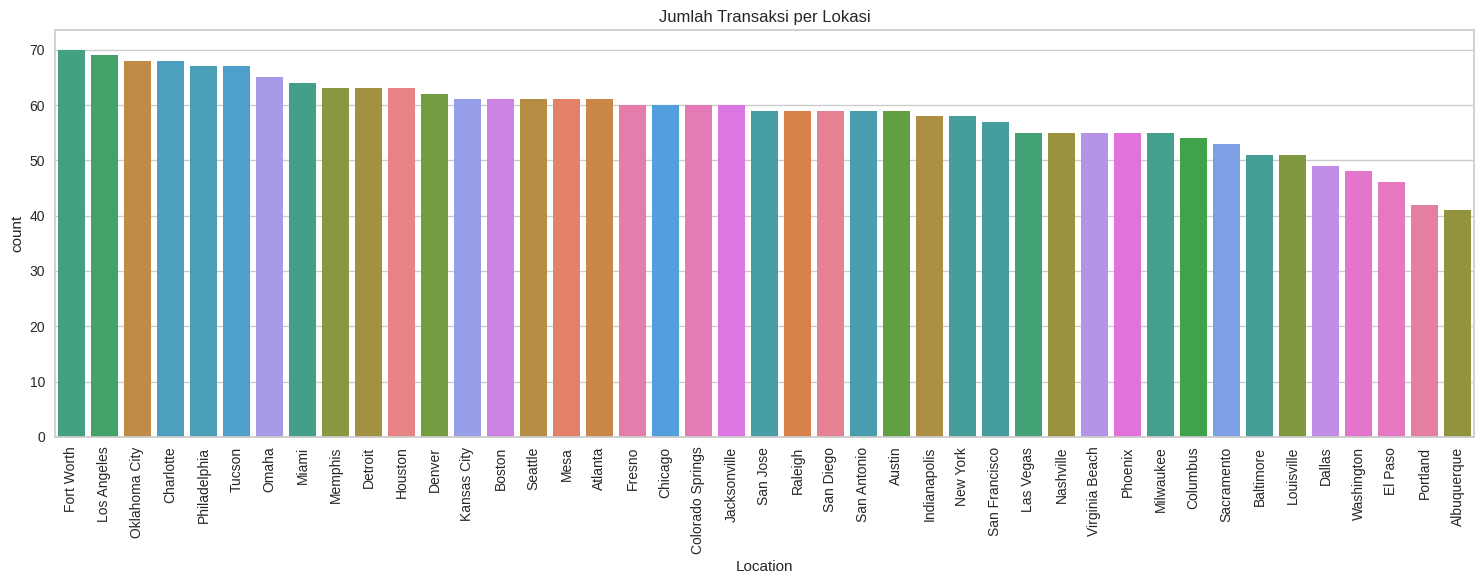

In [325]:
plt.figure(figsize=(15, 6))

all_locations = bank_transaction['Location'].value_counts().index
palette = sns.color_palette("husl", len(all_locations))
sns.countplot(
    data=bank_transaction,
    hue='Location',
    x='Location',
    order=all_locations,
    palette=palette,
    legend=False
)

plt.title('Jumlah Transaksi per Lokasi')
plt.xticks(rotation=90)  # Putar agar semua label kota bisa terlihat
plt.tight_layout()
plt.show()


**Insight:**
- Fort Worth dan Los Angeles merupakan lokasi dengan jumlah transaksi tertinggi.
- Portland dan Albuquerque merupakan lokasi dengan jumlah lokasi terendah.
- Terdapat perbedaan yang cukup signifikan antara jumlah transaksi di kota Fort Worth dan Albuquerque.

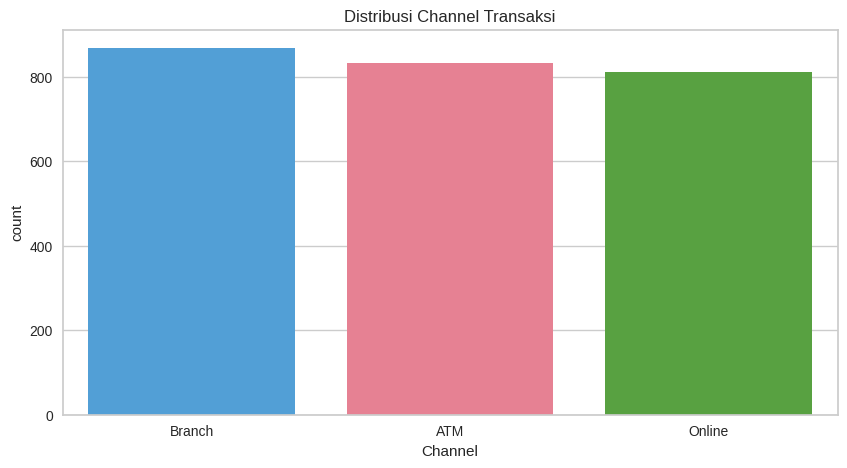

In [326]:
plt.figure(figsize=(10,5))
unique_types = bank_transaction['Channel'].nunique()
palette = sns.color_palette("husl", unique_types)

sns.countplot(data=bank_transaction, x='Channel', hue='Channel', order=bank_transaction['Channel'].value_counts().index, palette=palette, legend=False)
plt.title('Distribusi Channel Transaksi')
plt.show()

**Insight:**
- Jumlah channel transaksi Branch merupakan yang paling banyak digunakan dan channel transaksi online mrupakan yang paling sedikit digunakan.

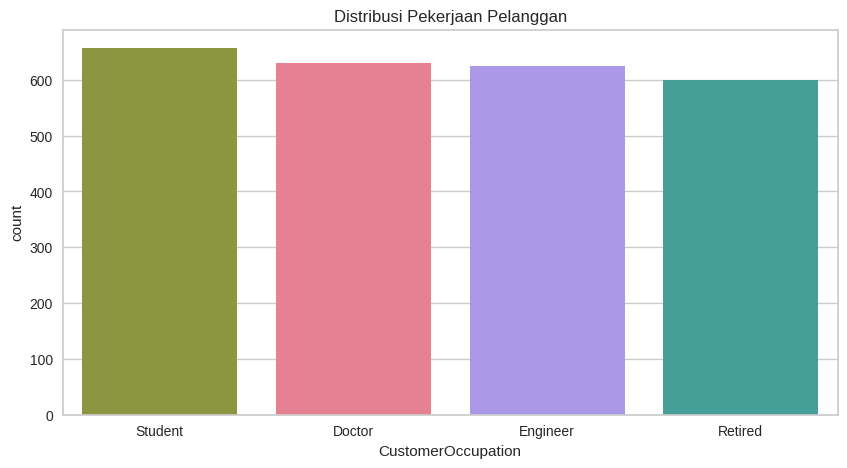

In [327]:
plt.figure(figsize=(10,5))
unique_types = bank_transaction['CustomerOccupation'].nunique()
palette = sns.color_palette("husl", unique_types)

sns.countplot(data=bank_transaction, x='CustomerOccupation', hue='CustomerOccupation', order=bank_transaction['CustomerOccupation'].value_counts().index, palette=palette, legend=False)
plt.title('Distribusi Pekerjaan Pelanggan')
plt.show()

**Insight:**
- Pelajar merupakan nasabah yang paling banyak melakukan transaksi.
- Pensiunan merupakan nasabah yang paling jarang melakukan transaksi.

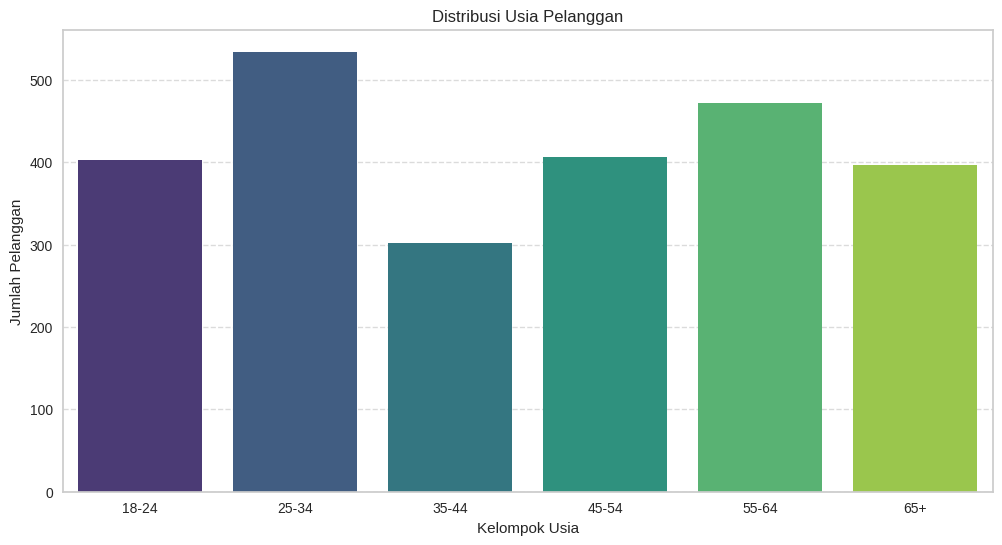

In [328]:
plt.figure(figsize=(12, 6))

# Binning usia ke dalam kategori
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bank_transactions = bank_transaction.copy()
bank_transactions['AgeGroup'] = pd.cut(bank_transaction['CustomerAge'], bins=bins, labels=labels, right=False)

# Visualisasi
sns.countplot(
    data=bank_transactions,
    x='AgeGroup',
    hue='AgeGroup',
    order=labels,
    palette='viridis',
    legend=False
)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**

Distribusi tersebut menunjukkan bahwa kelompok usia 25-34 adalah yang terbesar di antara nasabah, sementara usia 35-44 merupakan yang paling sedikit.

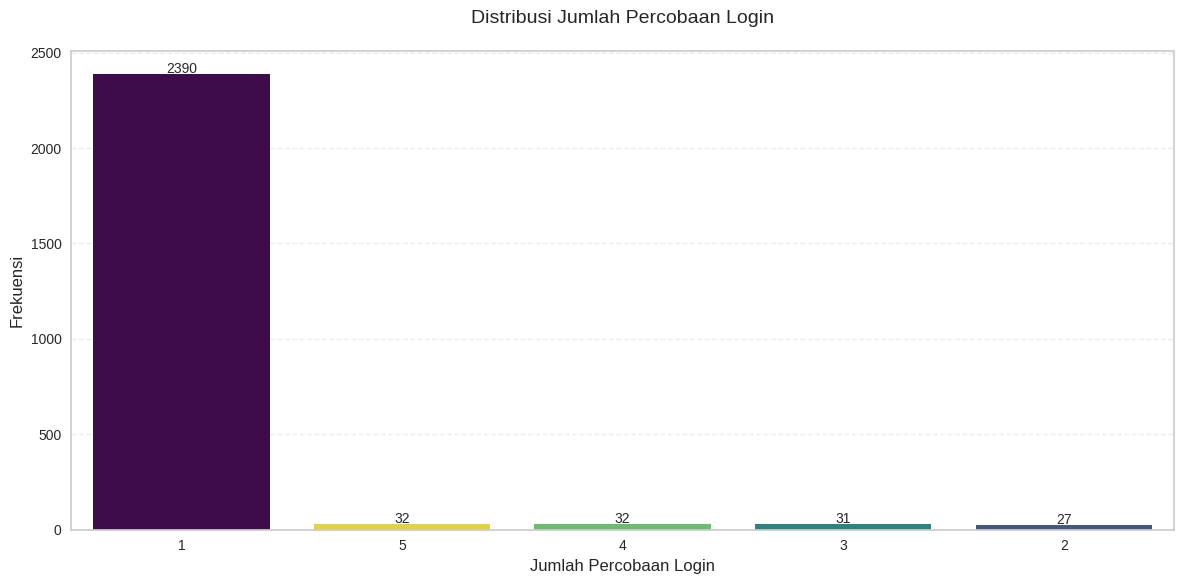

In [329]:
plt.figure(figsize=(12,6))

ax = sns.countplot(data=bank_transaction,
                 x='LoginAttempts',
                 hue='LoginAttempts',
                 order=bank_transaction['LoginAttempts'].value_counts().index,
                 palette='viridis',
                 legend=False)

plt.title('Distribusi Jumlah Percobaan Login', pad=20, fontsize=14)
plt.xlabel('Jumlah Percobaan Login', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Tambahkan label jumlah di setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 5,
            '{:1.0f}'.format(height),
            ha="center",
            fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Insight:**

Mayoritas nasabah hanya melakukan login sebanyak 1 kali. Jumlahnya sangat dominan (2930 dari 2512 data), menunjukkan bahwa sebagian besar pengguna berhasil login tanpa kendala.

Jumlah nasabah yang mencoba login lebih dari 1 kali (2 hingga 5 kali) sangat sedikit, dan distribusinya hampir merata kecil.

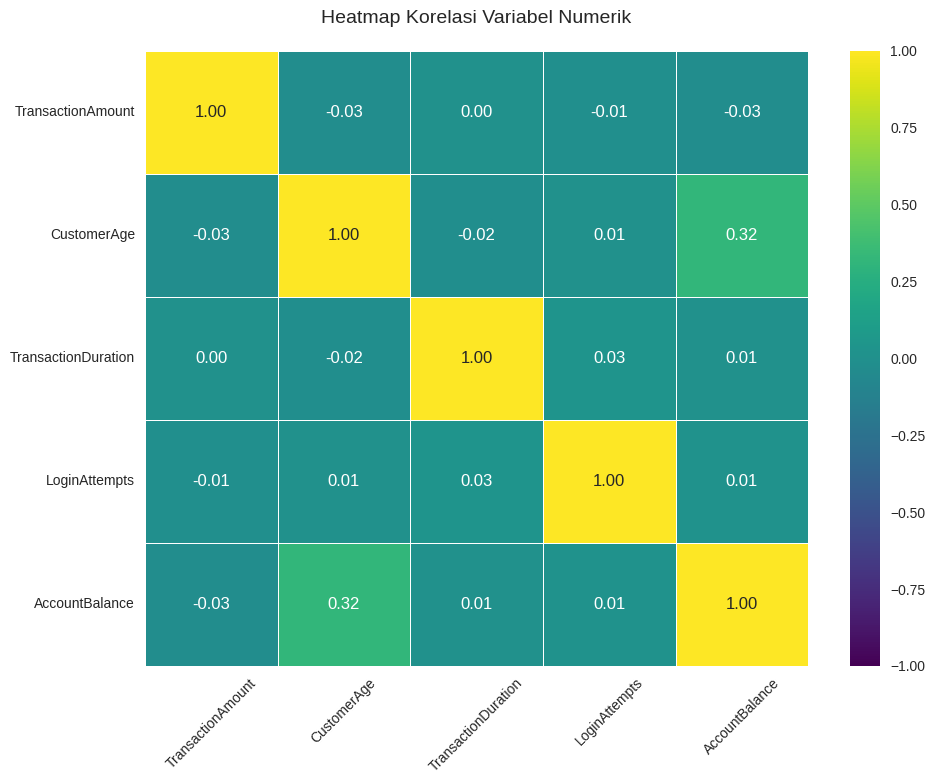

In [330]:
numerical_cols = bank_transaction.select_dtypes(include=['int64', 'float64']).columns

# 2. Buat matriks korelasi
corr_matrix = bank_transaction[numerical_cols].corr()

# 3. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='viridis',
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            fmt=".2f")

plt.title('Heatmap Korelasi Variabel Numerik', pad=20, fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**

Hubungan antar fitur memiliki nilai korelasi yang tergolong rendah, sehingga dapat diambil kesimpulan bahwa setiap fitur saling independen.

- Jumlah transaksi (TransactionAmount) dan durasi (TransactionDuration) tidak berkorelasi signifikan dengan variabel lain.
- Saldo akun (AccountBalance) berkorelasi positif dengan usia nasabah (0.32)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan:
1. Segmentasi fitur numerikal dan kategorikal
2. Konversi Tipe Data Kolom
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Gabungkan Kembali Seluruh Fitur yang Telah Diproses


### 1. Pisahkan fitur numerikal dan kategorikal yang relevan

In [331]:
bank_transaction_preprocessed = bank_transaction.copy()
numerical = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
categorical = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

num_df = bank_transaction_preprocessed[numerical]
cat_df = bank_transaction_preprocessed[categorical]

**Insight:**

- Kode ini membuat deep copy dari dataset asli, memastikan transformasi tidak mengubah data original.
- Segmentasi Kolom Numerik dan Kategorikal. Numerik yaitu kolom TransactionAmount, AccountBalance, CustomerAge, TransactionDuration, LoginAttempts. Kategorikal yaitu kolom TransactionType, Location, Channel, CustomerOccupation.

### 2. Konversi Tipe Data Kolom

In [332]:
convert_to_datetime = ['TransactionDate', 'PreviousTransactionDate']

for column in convert_to_datetime:
  bank_transaction_preprocessed[column] = pd.to_datetime(bank_transaction_preprocessed[column])

bank_transaction_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

**Insight:**

Tipe data kolom TransactionDate dan PreviousTransactionDate telah berhasil diubah menjadi datetime.

### 3. Normalisasi atau Standarisasi Fitur

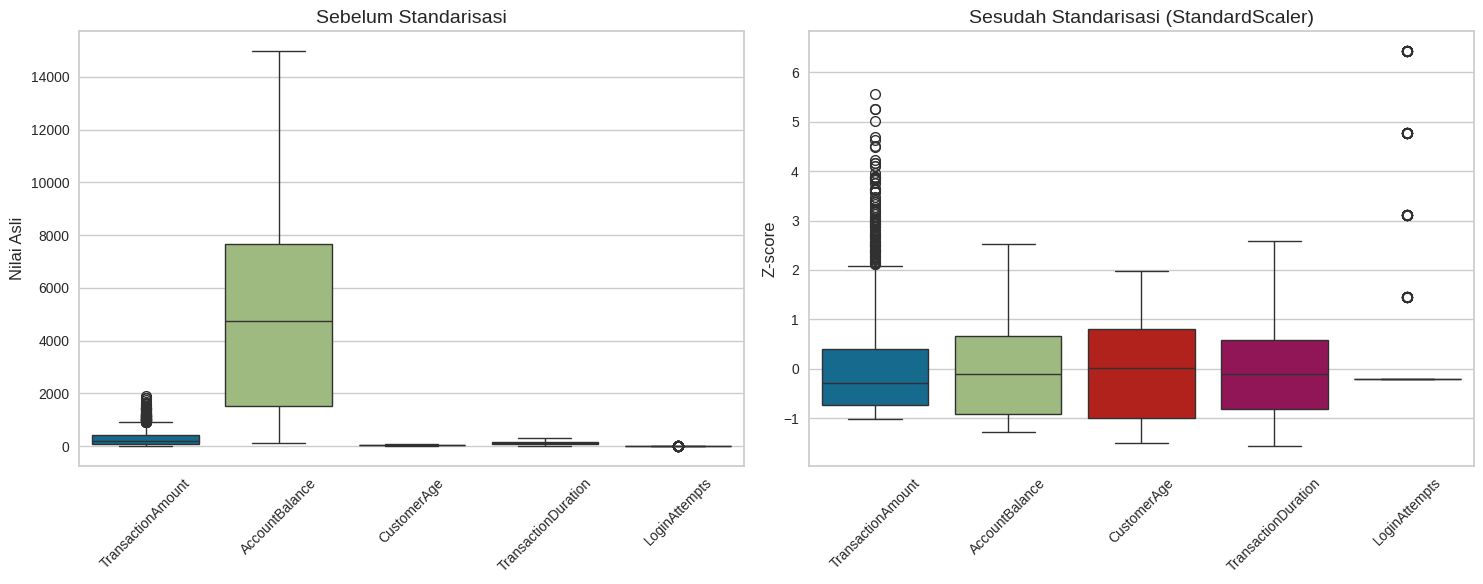

In [333]:
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(scaled_num, columns=numerical)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=num_df)
plt.title('Sebelum Standarisasi', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Nilai Asli', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_num_df)
plt.title('Sesudah Standarisasi (StandardScaler)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Z-score', fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**

Standarisasi (misal dengan StandardScaler) adalah teknik transformasi data numerik agar memiliki mean (rata-rata) = 0 dan standard deviation (simpangan baku) = 1

### 4. Deteksi dan Penanganan Outlier

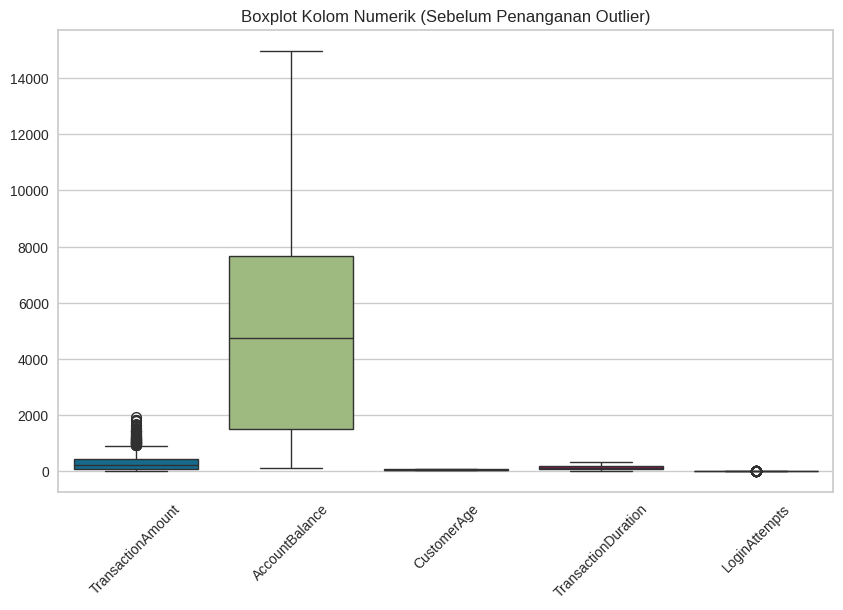

Jumlah outlier per kolom:
TransactionAmount      113
AccountBalance           0
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
dtype: int64


In [334]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10, 6))
sns.boxplot(data=num_df)
plt.xticks(rotation=45)
plt.title("Boxplot Kolom Numerik (Sebelum Penanganan Outlier)")
plt.show()

outliers = (num_df< lower_bound) | (num_df > upper_bound)
print("Jumlah outlier per kolom:")
print(outliers.sum())

**Insight:**

Terdapat outlier pada TransactionAmount dan LoginAttempts. Namun outlier pada TransactionAmount adalah valid karena nasabah memang mungkin untuk memiliki jumlah transaksi yang besar. Kemudian outlier pada LoginAttempts juga mengandung informasi penting untuk fraud detection karena nilai yang tinggi bisa menjadi indikasi serangan brute force.

Berdasarkan pertimbangan tersebut, nilai outlier tidak akan di drop.

### 5. Enkoding Data Kategorikal

In [335]:
label_encoder = LabelEncoder()
cat_df_encoded = cat_df.copy()

for column in categorical:
  cat_df_encoded[column] = label_encoder.fit_transform(cat_df_encoded[column])

print(cat_df.head())

  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  Online            Student


**Insight:**

Nilai pada kolom kategorikal telah berhasil di enkoding, terlihat pada data yang ditampilkan di atas.

### 6. Gabungkan Kembali Seluruh Fitur yang Telah Diproses

In [336]:
bank_transaction_processed = pd.concat([
    scaled_num_df,
    cat_df_encoded,
    bank_transaction_preprocessed[convert_to_datetime]
], axis=1)

bank_transaction_processed.head()

,TransactionAmount,AccountBalance,CustomerAge,TransactionDuration,LoginAttempts,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,PreviousTransactionDate
0,-0.971275,-0.000537,1.423718,-0.552443,-0.206794,1,36,0,0,2023-04-11 16:29:14,2024-11-04 08:08:08
1,0.269440,2.216472,1.311287,0.305314,-0.206794,1,15,0,0,2023-06-27 16:44:19,2024-11-04 08:09:35
2,-0.586882,-1.023534,-1.443277,-0.909842,-0.206794,1,23,2,3,2023-07-10 18:16:08,2024-11-04 08:07:04
3,-0.387456,0.885797,-1.049768,-1.353017,-0.206794,1,33,2,3,2023-05-05 16:32:11,2024-11-04 08:09:06
4,-0.973468,0.593589,-1.049768,1.120184,-0.206794,0,1,2,3,2023-10-16 17:51:24,2024-11-04 08:06:39


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [337]:
# Drop kolom bertipe datetime
bank_transaction_numeric = bank_transaction_processed.select_dtypes(exclude=['datetime64'])

# Bangun model KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(bank_transaction_numeric)

# Tambahkan label cluster ke DataFrame
bank_transaction_processed['Cluster'] = kmeans_labels

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

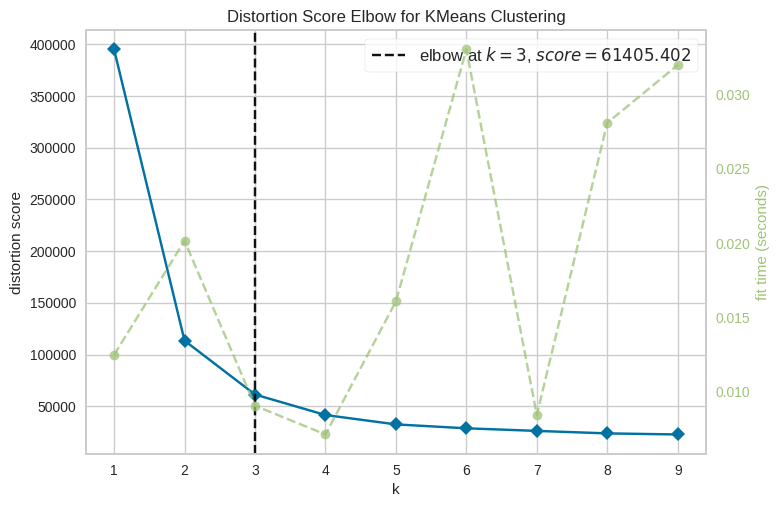

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [338]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(bank_transaction_numeric)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [339]:
# Hitung Silhouette Score untuk k=2
silhouette_avg = silhouette_score(bank_transaction_numeric, kmeans_labels)
print(f"Silhouette Score untuk k=2: {silhouette_avg:.3f}")

Silhouette Score untuk k=2: 0.571


In [340]:
# Bangun model dengan k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_3.fit_predict(bank_transaction_numeric)

# Tambahkan label cluster ke DataFrame
bank_transaction_processed['Cluster'] = kmeans_labels

In [341]:
# Hitung Silhouette Score untuk k=3
silhouette_avg = silhouette_score(bank_transaction_numeric, kmeans_labels)
print(f"Silhouette Score untuk k=3: {silhouette_avg:.3f}")

Silhouette Score untuk k=3: 0.491


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [342]:
# Inisialisasi model dasar untuk proses seleksi fitur
logreg_model = LogisticRegression(max_iter=500)

# Lakukan seleksi fitur menggunakan RFE, ambil 5 fitur teratas
rfe = RFE(estimator=logreg_model, n_features_to_select=5)
rfe.fit(bank_transaction_numeric, kmeans_labels)

# Simpan nama-nama fitur yang dipilih
fitur_terpilih = bank_transaction_numeric.columns[rfe.get_support()]
print("Fitur yang dipilih melalui RFE:", fitur_terpilih.to_list())

# Buat DataFrame baru hanya dengan fitur yang terpilih
data_rfe = bank_transaction_numeric[fitur_terpilih]

# Tampilkan 5 baris pertama dari data hasil seleksi fitur
print("\nData setelah seleksi fitur (head):")
print(data_rfe.head())


Fitur yang dipilih melalui RFE: ['TransactionAmount', 'AccountBalance', 'LoginAttempts', 'Location', 'Channel']

Data setelah seleksi fitur (head):
   TransactionAmount  AccountBalance  LoginAttempts  Location  Channel
0          -0.971275       -0.000537      -0.206794        36        0
1           0.269440        2.216472      -0.206794        15        0
2          -0.586882       -1.023534      -0.206794        23        2
3          -0.387456        0.885797      -0.206794        33        2
4          -0.973468        0.593589      -0.206794         1        2


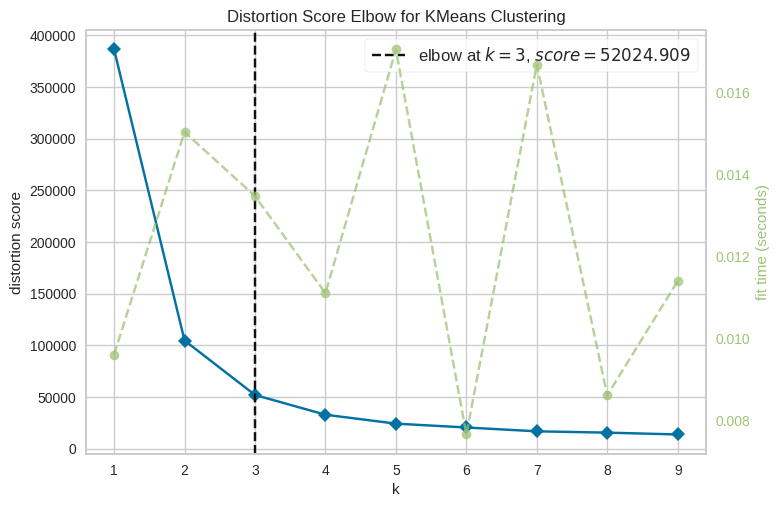

In [343]:
# Visualisasi Elbow untuk fitur yang sudah diseleksi
elbow_viz = KElbowVisualizer(KMeans(random_state=42), k=(1, 10))
elbow_viz.fit(data_rfe)
elbow_viz.show()

# Lakukan clustering kembali menggunakan fitur terpilih
kmeans_selected = KMeans(n_clusters=3, random_state=42)
hasil_cluster_rfe3 = kmeans_selected.fit_predict(data_rfe)

kmeans_selected = KMeans(n_clusters=2, random_state=42)
hasil_cluster_rfe2 = kmeans_selected.fit_predict(data_rfe)

In [344]:
# Hitung skor silhouette untuk hasil clustering setelah RFE
skor_silhouette_rfe = silhouette_score(bank_transaction_numeric[fitur_terpilih], hasil_cluster_rfe3)
print(f"Skor Silhouette sesudah RFE, dengan k=3: {skor_silhouette_rfe:.3f}")

skor_silhouette_rfe = silhouette_score(bank_transaction_numeric[fitur_terpilih], hasil_cluster_rfe2)
print(f"Skor Silhouette sesudah RFE, dengan k=2: {skor_silhouette_rfe:.3f}")

Skor Silhouette sesudah RFE, dengan k=3: 0.529
Skor Silhouette sesudah RFE, dengan k=2: 0.594


**Insight:**

Setelah dilakukan feature selection, nilai silhouette score pada k=3 meningkat dari 0.491 menjadi 0.529.

Sementara untuk sihouette score pada k=2 meningkat dari 0.571 menjadi 0.594.

Skor silhouette yang lebih tinggi pada k=2 menunjukkan bahwa data lebih alami terpisah menjadi 2 kelompok yang berbeda jelas.

Namun, KElbowVisualizer menunjukkan “elbow” di k=3.

Kesimpulan:

k=3 digunakan karena:
  - Didukung kedua metode (elbow dan silhouette)

  Silhouette score meningkat 7.7% (0.491 → 0.529) setelah feature selection

  Elbow method juga menunjuk k=3
  
  Sedangkan untuk k=2:
  
  Silhouette score hanya meningkat 4% (0.571 → 0.594)

In [345]:
# Buat salinan DataFrame baru dari fitur yang dipilih
data_rfe = bank_transaction_numeric[fitur_terpilih].copy()

# Tambahkan hasil cluster baru ke dalam DataFrame
data_rfe['Cluster'] = hasil_cluster_rfe3

data_rfe.head()

,TransactionAmount,AccountBalance,LoginAttempts,Location,Channel,Cluster
0,-0.971275,-0.000537,-0.206794,36,0,1
1,0.269440,2.216472,-0.206794,15,0,0
2,-0.586882,-1.023534,-0.206794,23,2,0
3,-0.387456,0.885797,-0.206794,33,2,1
4,-0.973468,0.593589,-0.206794,1,2,2


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

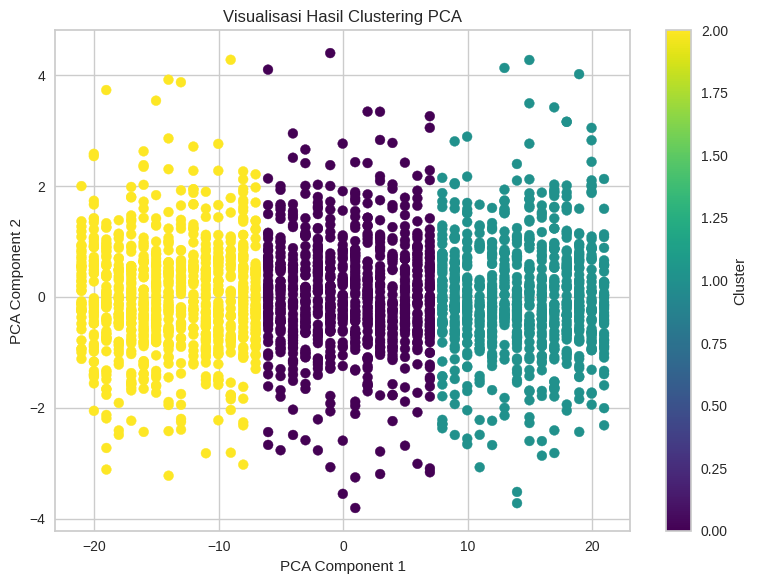

In [346]:
# Lakukan reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_rfe[fitur_terpilih])

# Buat scatter plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data_rfe['Cluster'], cmap='viridis', s=50)

# Tambahkan label dan judul
plt.title('Visualisasi Hasil Clustering PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [347]:
# Add cluster labels to the original dataframe
df_normalized = data_rfe.copy()
df_normalized['Cluster'] = hasil_cluster_rfe3

# Create LabelEncoder instance
label_encoder_channel = LabelEncoder()
label_encoder_transaction = LabelEncoder()
label_encoder_location = LabelEncoder()

# Fit the encoder on the original categorical data
label_encoder_channel.fit(cat_df['Channel'])
label_encoder_transaction.fit(cat_df['TransactionType'])
label_encoder_location.fit(cat_df['Location'])

# Now apply inverse_transform to the normalized data
df_normalized['Channel'] = label_encoder_channel.inverse_transform(df_normalized['Channel'])
df_normalized['Location'] = label_encoder_location.inverse_transform(df_normalized['Location'])

print("\nData Sesudah Inverse Transform:")
print(df_normalized.head())


Data Sesudah Inverse Transform:
   TransactionAmount  AccountBalance  LoginAttempts   Location Channel  \
0          -0.971275       -0.000537      -0.206794  San Diego     ATM   
1           0.269440        2.216472      -0.206794    Houston     ATM   
2          -0.586882       -1.023534      -0.206794       Mesa  Online   
3          -0.387456        0.885797      -0.206794    Raleigh  Online   
4          -0.973468        0.593589      -0.206794    Atlanta  Online   

   Cluster  
0        1  
1        0  
2        0  
3        1  
4        2  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [348]:
original_num_df = num_df.copy()
inverse_scaled = scaler.inverse_transform(scaled_num_df)

inverse_scaled_df = pd.DataFrame(inverse_scaled, columns=numerical)

num_features_selected_rfe = ['AccountBalance', 'LoginAttempts', 'TransactionAmount']
df_normalized[num_features_selected_rfe] = inverse_scaled_df[num_features_selected_rfe]

print(df_normalized.head())

   TransactionAmount  AccountBalance  LoginAttempts   Location Channel  \
0              14.09         5112.21            1.0  San Diego     ATM   
1             376.24        13758.91            1.0    Houston     ATM   
2             126.29         1122.35            1.0       Mesa  Online   
3             184.50         8569.06            1.0    Raleigh  Online   
4              13.45         7429.40            1.0    Atlanta  Online   

   Cluster  
0        1  
1        0  
2        0  
3        1  
4        2  


In [349]:
# Data yang akan di Klasifikasi
bank_transaction_final = df_normalized.copy()
bank_transaction_final.head()

,TransactionAmount,AccountBalance,LoginAttempts,Location,Channel,Cluster
0,14.09,5112.21,1.0,San Diego,ATM,1
1,376.24,13758.91,1.0,Houston,ATM,0
2,126.29,1122.35,1.0,Mesa,Online,0
3,184.50,8569.06,1.0,Raleigh,Online,1
4,13.45,7429.40,1.0,Atlanta,Online,2


In [350]:
# Keseluruhan data
bank_transaction_all = bank_transaction_preprocessed.copy()
bank_transaction_all['Cluster'] = data_rfe['Cluster']

bank_transaction_all.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [351]:
# Mendapatkan label cluster
labels = hasil_cluster_rfe3

# Mendapatkan jumlah cluster
k = 3

def analyze_each_cluster(X, cluster_labels, k):
      print("=== ANALISIS SETIAP KLUSTER ===")
      for cluster_id in range(k):
        cluster_data = X[cluster_labels == cluster_id]

        modus_channel = cluster_data['Channel'].mode().values[0]
        modus_location = cluster_data['Location'].mode().values[0]

        mean_transaction_amount = cluster_data['TransactionAmount'].mean()
        mean_login_attempts = cluster_data['LoginAttempts'].mean()
        mean_account_balance = cluster_data['AccountBalance'].mean()
        mean_transaction_duration = cluster_data['TransactionDuration'].mean()

        print(f"\nCluster {cluster_id}:")
        print(f"Rata-Rata Transaction Amount: {mean_transaction_amount}")
        print(f"Rata-Rata Login Attempt: {mean_login_attempts}")
        print(f"Rata-Rata Account Balance: {mean_account_balance}")
        print(f"Rata-rata Durasi Transaksi: {mean_transaction_duration}")
        print(f"Modus Channel: {modus_channel}")
        print(f"Modus Location: {modus_location}")

analyze_each_cluster(bank_transaction_all, labels, k)

=== ANALISIS SETIAP KLUSTER ===

Cluster 0:
Rata-Rata Transaction Amount: 298.7682520808561
Rata-Rata Login Attempt: 1.1557669441141498
Rata-Rata Account Balance: 5027.022342449465
Rata-rata Durasi Transaksi: 120.15338882282997
Modus Channel: Branch
Modus Location: Los Angeles

Cluster 1:
Rata-Rata Transaction Amount: 302.3316501240695
Rata-Rata Login Attempt: 1.096774193548387
Rata-Rata Account Balance: 5138.887853598015
Rata-rata Durasi Transaksi: 118.50372208436724
Modus Channel: Branch
Modus Location: Philadelphia

Cluster 2:
Rata-Rata Transaction Amount: 292.0371791907515
Rata-Rata Login Attempt: 1.1202312138728323
Rata-Rata Account Balance: 5176.2539306358385
Rata-rata Durasi Transaksi: 120.2092485549133
Modus Channel: Branch
Modus Location: Fort Worth


In [352]:
# Statistik deskriptif tiap kluster
numerik = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
print("\n\n=== STATISTIK DESKRIPTIF KLUSTER ===")
statistik_kluster = bank_transaction_all.groupby(hasil_cluster_rfe3)[numerik]\
    .agg(['mean', 'median', 'std', 'min', 'max'])
print(statistik_kluster.round(2))



=== STATISTIK DESKRIPTIF KLUSTER ===
  TransactionAmount                                AccountBalance           \
               mean  median     std   min      max           mean   median   
0            298.77  211.10  288.77  0.26  1762.28        5027.02  4574.43   
1            302.33  203.23  303.52  1.41  1919.11        5138.89  4576.93   
2            292.04  214.15  284.16  0.32  1831.02        5176.25  5109.97   

                              ... TransactionDuration                         \
       std     min       max  ...                mean median    std min  max   
0  3875.54  101.25  14881.77  ...              120.15  112.0  70.21  10  300   
1  3980.36  102.20  14977.99  ...              118.50  112.0  68.92  10  296   
2  3853.52  117.98  14942.78  ...              120.21  114.0  70.76  10  300   

  LoginAttempts                       
           mean median   std min max  
0          1.16    1.0  0.68   1   5  
1          1.10    1.0  0.54   1   5  
2          1.

# Interpretasi
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-Rata Transaction Amount:** 298.7682520808561
- **Rata-Rata Login Attempt:** 1.1557669441141498
- **Rata-Rata Account Balance:** 5027.022342449465
- **Rata-rata Durasi Transaksi:** 120.15338882282997
- **Modus Channel:** Branch
- **Modus Location:** Los Angeles
- **Analisis:** Nasabah di cluster ini menunjukkan pola transaksi yang cukup aktif, dengan pengeluaran transaksi menengah dan saldo rekening yang relatif stabil. Frekuensi login yang juga menengah mengindikasikan keterlibatan yang konsisten namun tidak intens.


## Cluster 1:
- **Rata-Rata Transaction Amount:** 302.3316501240695
- **Rata-Rata Login Attempt:** 1.096774193548387
- **Rata-Rata Account Balance:** 5138.887853598015
- **Rata-rata Durasi Transaksi:** 118.50372208436724
- **Modus Channel:** Branch
- **Modus Location:** Philadelphia
- **Analisis:** Cluster ini menampung nasabah dengan pengeluaran transaksi tertinggi dan saldo akun yang besar, menunjukkan potensi sebagai segmen premium. Mereka cenderung melakukan transaksi besar secara berkala dan menggunakan layanan cabang.

## Cluster 2:
- **Rata-Rata Transaction Amount:** 292.0371791907515
- **Rata-Rata Login Attempt:** 1.1202312138728323
- **Rata-Rata Account Balance:** 5176.2539306358385
- **Rata-rata Durasi Transaksi:** 120.2092485549133
- **Modus Channel:** Branch
- **Modus Location:** Fort Worth
- **Analisis:** Meskipun memiliki saldo akun tertinggi, pelanggan dalam cluster ini memiliki pengeluaran transaksi terendah. Ini menunjukkan karakter pelanggan yang konservatif dalam pengeluaran, mungkin lebih fokus pada tabungan atau investasi. Mereka tetap terhubung dengan layanan cabang, meski dengan aktivitas transaksi yang lebih rendah.


*Assumptive labeling* berdasarkan statistik deskriptif:
  - Cluster 0 = Memiliki saldo paling rendah, besaran transaksi menengah, jumlah percobaan login tinggi, dan durasi transaksi menengah.
  
  Label: **Suspicious**
  
  Alasan: Pola ini menunjukkan aktivitas cukup tinggi, tapi saldo rendah, nasabah aktif, tapi dengan dana terbatas. Pengguna yang mencoba banyak login dengan dana rendah, ini bisa mengarah ke aktivitas suspicious.

  - Cluster 1 = Memiliki saldo menengah, besaran transaksi paling tinggi, jumlah percobaan login rendah, dan durasi transaksi rendah.
  
  Label: **Fraud**
  
  Alasan: Cluster ini memiliki pengeluaran transaksi tertinggi dan saldo akun yang besar, tetapi frekuensi login yang rendah dan durasi transaksi yang singkat dapat menunjukkan perilaku yang tidak biasa. Kombinasi ini bisa menunjukkan pola seperti nasabah jarang login tapi begitu login langsung melakukan transaksi besar dalam waktu singkat.

  - Cluster 2 = Memiliki saldo tertinggi, besaran transaksi terendah, percobaan login menengah, dan durasi transaksi tinggi.
  
  Label: **Normal**
  
  Alasan: Nasabah dalam cluster ini memiliki saldo tertinggi dan pengeluaran terendah, karakteristik ini menunjukkan perilaku yang konservatif dan fokus pada tabungan atau investasi. Aktivitas transaksi yang lebih rendah tidak menunjukkan indikasi kecurangan atau perilaku mencurigakan.




In [353]:
label_mapping = {
    0: "Suspicious",
    1: "Fraud",
    2: "Normal"
}

# Data yang akan di Klasifikasi
bank_transaction_final['Cluster'] = bank_transaction_final['Cluster'].map(label_mapping)

# Keseluruhan Data
bank_transaction_all['Cluster'] = bank_transaction_all['Cluster'].map(label_mapping)
bank_transaction_final.head()

,TransactionAmount,AccountBalance,LoginAttempts,Location,Channel,Cluster
0,14.09,5112.21,1.0,San Diego,ATM,Fraud
1,376.24,13758.91,1.0,Houston,ATM,Suspicious
2,126.29,1122.35,1.0,Mesa,Online,Suspicious
3,184.50,8569.06,1.0,Raleigh,Online,Fraud
4,13.45,7429.40,1.0,Atlanta,Online,Normal


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [354]:
bank_transaction_final.to_csv('bank_transactions_clustered.csv', index=False)